In [1]:
#standard includes

import matplotlib
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
import mpld3
mpld3.enable_notebook()

rng = np.random

import math

import numba

matplotlib.rcParams['figure.figsize'] = (12.0, 6)

import SmoothedMinimization as SmoothedMinimization

In [2]:

def get_avg(LQ3):
    t1 = np.zeros([Iterations,len(LQ3)])
    i=0
    for LQ in LQ3:
        t1[:,i] = LQ.totalCost
        i+=1
    return np.mean(t1,axis=1)

def get_med(LQ3):
    t1 = np.zeros([Iterations,len(LQ3)])
    i=0
    for LQ in LQ3:
        t1[:,i] = LQ.totalCost
        i+=1
    return np.median(t1,axis=1)

def get_cost(LQ3):
    t1 = []
    for LQ in LQ3:
        t1.append(LQ.totalCost)
    return np.asarray(t1)

In [3]:
def dynamics(self, x,uplusnoise):
    xnew = x.copy()
    x1 = x[:,0]
    x2 = x[:,1]
    x3 = x[:,2]
    x4 = x[:,3]
    
    m1=1
    m2=1
    l1=1
    l2=2
    lc1=0.5
    lc2=1
    G=9.8
    
    c1 =2.663
    d11 =c1+2*np.cos(x2)
    d22 =1.33
    d12 =d22+np.cos(x2)
    d21 =d12
    h1 =-m2*l1*lc2*np.sin(x2)*(x4**2+2*x3*x4)
    h2 =m2*l1*lc2*np.sin(x2)*x3**2
    phi1 =(m1*lc1+m2*l1)*G*np.cos(x1)+m2*lc2*G*np.cos(x1+x2)
    phi2 =m2*lc2*G*np.cos(x1+x2)
    
    D=d11*d22-d12**2
    

    
    
    f1=x3
    f2=x4
    f3=(-d22*(h1+phi1)+d12*(h2+phi2))/D
    f4=(d12*(h1+phi1)-d11*(h2+phi2))/D
    
    scaling=0.2
    
    g1=0
    g2=0
    g3=-d12/D*scaling
    g4=d11/D*scaling
    
    dt=0.01
    
    xnew[:,0] = x1 + dt*(f1 +g1*uplusnoise)
    xnew[:,1] = x2 + dt*(f2 +g2*uplusnoise)
    xnew[:,2] = x3 + dt*(f3 +g3*uplusnoise)
    xnew[:,3] = x4 + dt*(f4 +g4*uplusnoise)

    #print f1, f2, f3, f4
    #print g3,g4
    
    
    return xnew

def V(self,x,i):
    y=np.sin(x[:,0])+2*np.sin(x[:,0]+x[:,1])
    V = 0
    if i==(self.ln-1):
        V = -500*y+10*(x[:,2]**2+x[:,3]**2)
        V = V/self.dt
    return V

def basisfunctions(self,x):
    x1 = x[:,0]
    x2 = x[:,1]
    x3 = x[:,2]
    x4 = x[:,3]
    arrays = [np.cos(x1),np.sin(x1),np.cos(x2),np.sin(x2),np.sin(x1+x2),np.cos(x1+x2),x3,x4,np.ones(x1.shape)]
    return np.stack(arrays)

def plot(self):
    x=self.x
    plt.subplot(2, 2, 1)
    plt.plot(self.timeline,np.sin(x[:,1:10,0])+2*np.sin(x[:,1:10,0]+x[:,1:10,1]));
    #plt.plot(self.Psiseries[:,1],self.Thetaseries[:,0])
    plt.subplot(2, 2, 2)
    plt.plot(self.EntESS);
    plt.plot(self.EntESStrue);
    plt.subplot(2, 2, 3)
    plt.plot(self.ESStrue);
    plt.plot(self.ESS);
    plt.subplot(2, 2, 4)
    plt.plot(self.totalCost);

SmoothedMinimization.SmoothedMinimization.dynamics = dynamics
SmoothedMinimization.SmoothedMinimization.V = V
SmoothedMinimization.SmoothedMinimization.basisfunctions = basisfunctions
SmoothedMinimization.SmoothedMinimization.plot = plot

In [ ]:
Iterations =2000
T = 3.0 #Horizont
dt = 0.01
N = 500 #number of rollouts
M=9 #number of basis functions
D=4
xinit = np.array([-math.pi/2,0.0,0,0])

cgit = -1

delta = 0.06
epsilon = 0.01

In [ ]:
LQ1 = []

for i in range(10):
    LQ1.append(SmoothedMinimization.SmoothedMinimization(Iterations, T, dt, N, M,D,xinit, delta,epsilon))
    print(i)

i = 1
for LQ in LQ1:
    LQ.run("TRPO",0,0,maxit=cgit)
    LQ.plot()
    print(i)
    i = i + 1

0
1
2
3
4
5
6
7
8
9
TRPO


In [ ]:
LQ2 = []

for i in range(10):
    LQ2.append(SmoothedMinimization.SmoothedMinimization(Iterations, T, dt, N, M,D,xinit, 0.1,epsilon))
    print(i)

i = 1
for LQ in LQ2:
    LQ.run("naturalPICE",0,0,maxit=cgit)
    LQ.plot()
    print(i)
    i = i + 1

In [ ]:
LQ3 = []

for i in range(10):
    LQ3.append(SmoothedMinimization.SmoothedMinimization(Iterations, T, dt, N, M,D,xinit, 0.5,epsilon))
    print(i)

i = 1
for LQ in LQ3:
    LQ.run("naturalPICE",0,0,maxit=cgit)
    LQ.plot()
    print(i)
    i = i + 1

In [ ]:
LQ4 = []

for i in range(10):
    LQ4.append(SmoothedMinimization.SmoothedMinimization(Iterations, T, dt, N, M,D,xinit, 1.,epsilon))
    print(i)

i = 1
for LQ in LQ4:
    LQ.run("naturalPICE",0,0,maxit=cgit)
    LQ.plot()
    print(i)
    i = i + 1

In [ ]:
for LQ in LQ1:
    plt.plot(LQ.totalCost,'blue');
    
for LQ in LQ2:
    plt.plot(LQ.totalCost,'black');
    
for LQ in LQ3:
    plt.plot(LQ.totalCost,'magenta');

for LQ in LQ4:
    plt.plot(LQ.totalCost,'magenta');

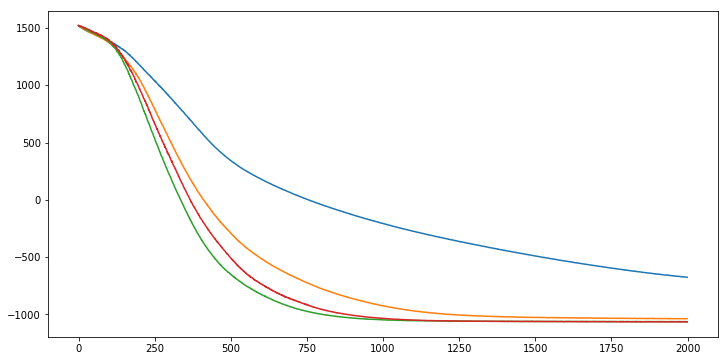

In [13]:
plt.plot(get_avg(LQ1))
plt.plot(get_avg(LQ2))
plt.plot(get_avg(LQ3))
plt.plot(get_avg(LQ4))

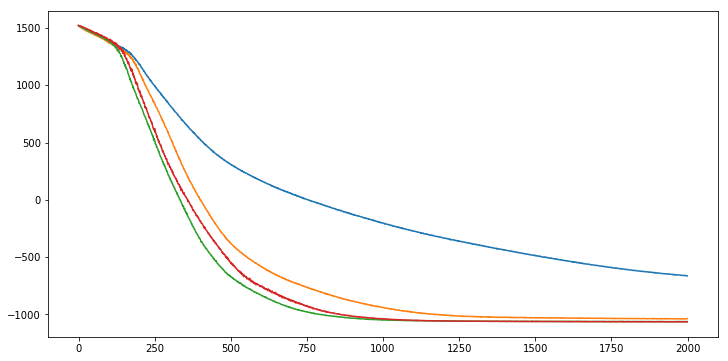

In [14]:
plt.plot(get_med(LQ1))
plt.plot(get_med(LQ2))
plt.plot(get_med(LQ3))
plt.plot(get_med(LQ4))

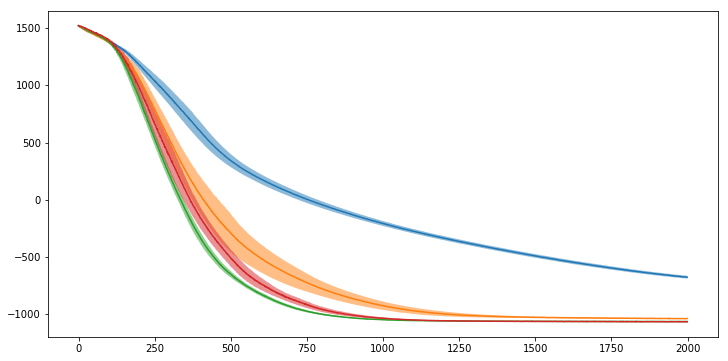

In [15]:
stamp = "Chapter4AcrobotEndCost2018"
file_path = "newChapter4Data/"

file_identifier = stamp+"Noise0.2N500smallTRPOpinv"
Jdata=get_cost(LQ1)
np.save(file_path+file_identifier+".npy",Jdata)


plt.plot(Jdata.mean(axis=0))
plt.fill_between(np.arange(0,2000), Jdata.mean(axis=0)+Jdata.std(axis=0)*0.5, Jdata.mean(axis=0)-Jdata.std(axis=0)*0.5, alpha=0.5,edgecolor='none')



file_identifier = stamp+"Noise0.2N500smallJ0.1pinv"
Jdata=get_cost(LQ2)
np.save(file_path+file_identifier+".npy",Jdata)

plt.plot(Jdata.mean(axis=0))
plt.fill_between(np.arange(0,2000), Jdata.mean(axis=0)+Jdata.std(axis=0)*0.5, Jdata.mean(axis=0)-Jdata.std(axis=0)*0.5, alpha=0.5,edgecolor='none')


file_identifier = stamp+"Noise0.2N500smallJ0.5pinv"
Jdata=get_cost(LQ3)
np.save(file_path+file_identifier+".npy",Jdata)

plt.plot(Jdata.mean(axis=0))
plt.fill_between(np.arange(0,2000), Jdata.mean(axis=0)+Jdata.std(axis=0)*0.5, Jdata.mean(axis=0)-Jdata.std(axis=0)*0.5, alpha=0.5,edgecolor='none')


file_identifier = stamp+"Noise0.2N500smallJ1.0pinv"
Jdata=get_cost(LQ4)
np.save(file_path+file_identifier+".npy",Jdata)

plt.plot(Jdata.mean(axis=0))
plt.fill_between(np.arange(0,2000), Jdata.mean(axis=0)+Jdata.std(axis=0)*0.5, Jdata.mean(axis=0)-Jdata.std(axis=0)*0.5, alpha=0.5,edgecolor='none')
